# 전자서명과 PKI

## ✅ 전자서명 vs 암호화 비교표

| 항목 | **전자서명 (Digital Signature)** | **암호화 (Encryption)** |
| --- | --- | --- |
| 🎯 **목적** | 무결성, 인증, 부인방지 | 기밀성 보호 |
| 🔐 **사용 키** | **개인키로 서명**, 공개키로 검증 | **공개키로 암호화**, 개인키로 복호화 |
| 📩 **수신자 역할** | 서명을 **검증** | 암호문을 **복호화** |
| 🔁 **단방향성** | **일방향** (서명 후 검증) | 복호화 가능 (양방향) |
| 🧾 **적용 대상** | 인증서, 전자문서, 코드서명 등 | 메시지, 파일, 세션키 등 |
| 🎓 **시험 키워드** | 무결성, 부인방지, 인증 | 기밀성, 제3자 보호 |

---

## 💡 외우는 포인트

- **암호화는 감추기 위한 것**,

    > → 평문 → 암호문으로 바꿔서 기밀성 유지
    >
- **전자서명은 증명하기 위한 것**,

    > → 평문 → 해시 → 개인키로 서명해서 무결성/인증
    >

---

## 🧠 예시

### 🔐 암호화 흐름 (공개키 암호화)

> 송신자: 수신자의 공개키로 암호화
>
>
> 수신자: 자신의 **개인키**로 복호화
>
> ✅ 기밀성 보장
>

---

### ✍️ 전자서명 흐름

> 서명자: 자신의 개인키로 서명
>
>
> 검증자: 서명자의 **공개키**로 검증
>
> ✅ 무결성 + 신원 인증 + 부인방지
>

---

## 📌 시험 자주 나오는 함정 보기 예

> "전자서명은 개인키로 생성하고, 공개키로 복호화하여 기밀성을 유지한다." → ❌
>
>
> → 기밀성이 아니라 **무결성과 부인방지**가 목적
>

# X.509

## ✅ 공시용 X.509 개념 정리 (실무 연계)

### 1. 🔒 X.509 인증서란?

- **공개키 기반 구조(PKI)**에서 사용하는 **디지털 인증서 표준 형식**
- 인증서 형식은 `.pem`, `.crt`, `.cer` 등으로 저장됨
- TLS/HTTPS/전자서명 등 모든 보안 통신의 근간

---

### 2. 📄 X.509 인증서 구성 필드

| 필드명 | 설명 | 실무 예시 |
| --- | --- | --- |
| **버전(version)** | 인증서 포맷 버전 | 일반적으로 v3 |
| **일련번호(serial number)** | CA가 부여한 고유 번호 | 인증서 폐기시 참조 |
| **서명 알고리즘** | 인증서 서명에 사용된 알고리즘 | `sha256WithRSAEncryption` |
| **발급자(issuer)** | CA 정보 | `Let's Encrypt Authority X3` |
| **유효 기간** | 인증서 시작/만료 날짜 | certbot 갱신 자동화로 관리 |
| **주체(subject)** | 서버 도메인 정보 | `CN=yourdomain.com` |
| **공개키 정보** | 서버의 공개키 포함 | RSA/ECDSA 공개키 |
| **서명 값** | CA의 개인키로 서명한 해시값 | 인증서 위변조 방지 |

---

### 3. ⚙️ 실무 연계 예시

- `openssl x509 -in cert.pem -text -noout`

    → X.509 인증서 구조 확인 가능

    → 시험에서 나오는 필드명 그대로 보임 (issuer, subject, validity 등)

- Nginx 설정:

    ``` nginx
    ssl_certificate     /etc/letsencrypt/live/example.com/fullchain.pem;
    ssl_certificate_key /etc/letsencrypt/live/example.com/privkey.pem;

    ```

- 웹 브라우저 → `🔒` 눌러서 인증서 세부 정보 보면 X.509 구조가 그대로 나옴

---

### 4. ✍️ 공시 단답형 예제 패턴

- X.509는 무엇인가?

    → **공개키 인증서를 위한 국제 표준**

- X.509 인증서에 들어가는 정보는?

    → **버전, 발급자, 유효기간, 서명 알고리즘, 공개키 등**

- 인증서 검증 흐름은?

    → **클라이언트가 CA의 공개키로 서명 검증 → 인증서 유효성 확인**


---

### 🧠 암기 + 실무 도식 흐름 예시

```
[서버]
  │
  ├── 공개키 → X.509 인증서에 포함
  │             ↓
[CA: 인증기관]
  └── CA 개인키로 서명  → 최종 .crt 파일
                         ↓
[클라이언트]
  └── CA 공개키로 인증서 서명 검증

```

**PKI(Public Key Infrastructure)의 저장소(storage)**는 개념적으로는 "공개키, 인증서, 폐기 목록 등을 저장하고 관리하는 시스템"을 의미하는데,

**실무에서는 이 저장소 역할을 `Nginx`나 서버가 로컬 파일로 직접 불러오도록 구성합니다.**

---

## ✅ PKI 구성요소에서의 "저장소"란?

| 구성요소 | 역할 | 실무 예시 |
| --- | --- | --- |
| 인증기관(CA) | 인증서 발급 및 서명 | Let's Encrypt, DigiCert |
| 등록기관(RA) | 사용자 인증 대행 | 보통 CA 내부 또는 위탁 |
| **저장소** (Repository) | 인증서 및 폐기목록(CRL) 저장·공개 | **Nginx가 불러오는 인증서 파일들이 여기에 해당** |
| 인증서 폐기 목록(CRL) | 만료/폐기된 인증서 목록 | `crl.pem` |
| OCSP 서버 | 인증서 실시간 유효성 검사 | 실시간 API 형태로 제공 |

---

## 📂 실무 저장소 위치 (Nginx 기준)

```
/etc/letsencrypt/live/example.com/
├── cert.pem         ← 서버 인증서 (공개키 포함) → 저장소
├── chain.pem        ← 중간 인증기관 인증서       → 저장소
├── fullchain.pem    ← cert.pem + chain.pem 합본  → 저장소
├── privkey.pem      ← 서버 개인키 (비공개)       → ❌ 저장소 X (로컬에만)

```

이 파일들이 실질적으로 **"PKI 저장소의 실체"**라고 보면 됩니다.

즉, 저장소는 추상적인 개념이고 → **nginx는 거기서 인증서 파일을 로컬 경로로 불러오는 구조**예요.

---

## 🔌 nginx 설정 예시

```nginx
server {
    listen 443 ssl;
    server_name example.com;

    ssl_certificate     /etc/letsencrypt/live/example.com/fullchain.pem;
    ssl_certificate_key /etc/letsencrypt/live/example.com/privkey.pem;
}

```

- `fullchain.pem` ← 저장소에 보관된 인증서들
- `privkey.pem` ← 저장소가 아닌 **서버 로컬에만 존재**, 절대 외부 유출 금지

---

## 🧠 공시 시험 포인트 정리

| 용어 | 정의 |
| --- | --- |
| 저장소 (repository) | 인증서 및 폐기 목록을 보관하는 곳 |
| 실무 대응 | `.crt`, `.pem`, `.cer` 파일들이 저장된 서버 경로 |
| nginx 역할 | 저장소로부터 인증서를 **불러와서 통신에 사용** |
| 개인키는 저장소 대상인가? | ❌ 아니다. 개인키는 절대 공개 안됨 |

---

### 그래서 송신자와 수신자는 누구야?

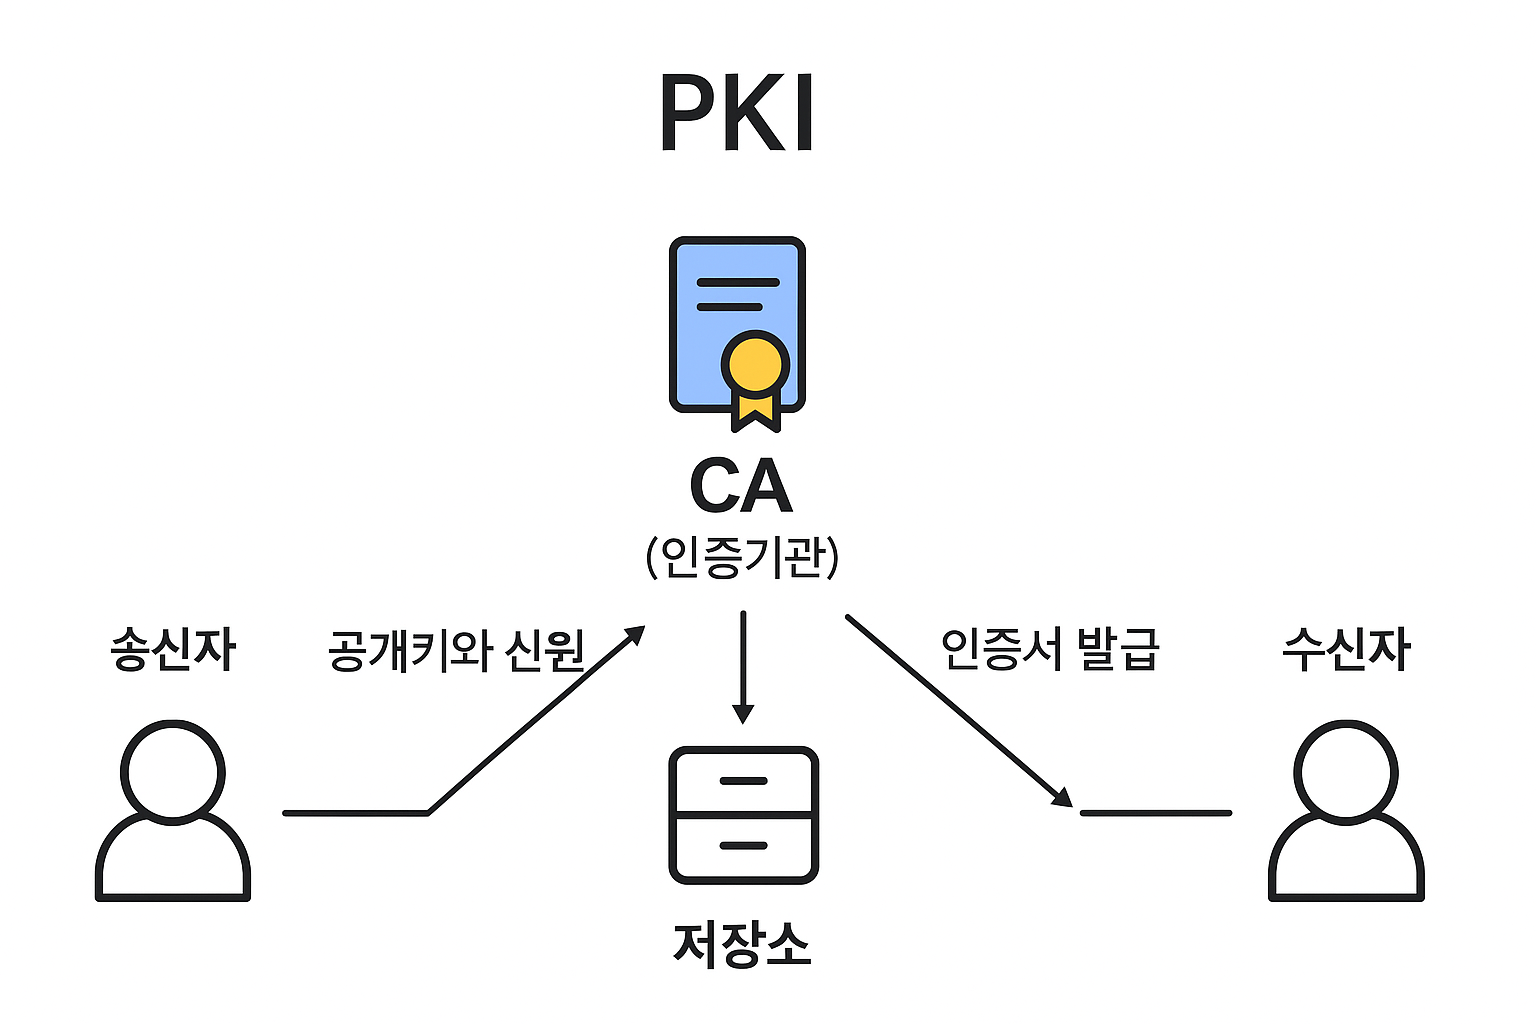

In [1]:
from IPython.display import Image

# 이미지 파일 경로 설정
image_path = 'pki1.png'

# 이미지 출력
Image(filename=image_path)

## ✅ 정리: 누가 개인키를 가지고 있나?

| 키 종류 | 소유 주체 | 설명 |
| --- | --- | --- |
| **CA의 개인키** | 인증기관(CA)만 보유 | 인증서에 **디지털 서명**할 때만 사용됨절대 유출되어선 안 됨 |
| **서버의 개인키** | **Nginx 서버가 보유** | 클라이언트가 보내온 세션키를 복호화할 때 사용`privkey.pem`으로 저장됨 |

---

## 🔐 실무 구조 예시 (Let's Encrypt)

### 1. CA (예: Let's Encrypt)

- `CA 개인키` → 인증서 서명 용도
- 이 키는 공개되지 않고, **보안이 매우 중요**

### 2. 사용자의 웹서버 (예: Nginx)

- `privkey.pem` = 서버 소유의 개인키 ← **이건 본인만 보유**
- `cert.pem` = 서버 공개키 + CA 서명된 인증서
- 보통 위치:

    ```bash
    /etc/letsencrypt/live/도메인명/privkey.pem
    ```


---

## 🎯 다시 말해 정리하면

| 질문 | 답변 |
| --- | --- |
| CA는 어떤 개인키를 들고 있나요? | **CA 자신의 개인키** (서명용) |
| 배포 서버(Nginx)는 어떤 키를 갖고 있나요? | **자기 자신의 개인키** (`privkey.pem`) |
| 이 두 키는 같은 건가요? | ❌ 전혀 다름. 각자 목적과 소유가 다름 |
| 인증서에 있는 서명은 어떤 키로 했나요? | **CA의 개인키**로 한 것 (수신자가 CA 공개키로 검증) |
| HTTPS에서 세션키를 복호화하는 키는? | **서버의 개인키 (`privkey.pem`)** |

---

## 📌 암기 팁

- 🔐 **CA의 개인키** = 인증서 서명용
- 🔐 **서버의 개인키** = 세션키 복호화용 (Nginx 경로에 있음)
- 🗂️ **인증서 (`.crt`, `.pem`)** = 서버 공개키 + CA 서명 포함

---
### Q. PKI를 위한 요소 시스템으로 옳지 않은 것은?
1) 인증서와 인증서 폐지 목록을 공개하기 위한 디렉토리
2) 사용자 신원을 확인하는 등록기관
3) 인증서 발행업무를 효율적으로 수행하기 위한 인증기관 웹 서버
4) 인증서를 발행받는 사용자(최종 개체)

---

## ✅ 보기별 해설

### 1) 인증서와 인증서 폐지 목록을 공개하기 위한 디렉토리

✅ **정답 아님 (옳은 요소)**

- PKI에서 말하는 “디렉토리”는 실무에서는 보통 저장소(Repository)입니다.
    - 예: `nginx`가 불러오는 `/etc/letsencrypt/live/...`
    - CA가 관리하는 공개 디렉토리 (ex: CRL, OCSP)
- *X.500 기반 디렉토리 서비스(LDAP)**일 수도 있지만, 요즘은 웹 서버(nginx 포함)가 그 역할을 하죠.
- ✔️ 따라서 옳은 PKI 구성요소입니다.

---

### 2) 사용자 신원을 확인하는 등록기관

✅ **정답 아님 (옳은 요소)**

- **RA (Registration Authority)** = 사용자의 신원을 확인하고 CA에게 인증서 발급 요청을 위임
- 실무에선 CA와 RA가 통합되어 있는 경우가 많아서 **자주 노출되지 않지만**, 개념적으로는 분명히 존재
- ✔️ PKI 핵심 요소 중 하나

---

### 3) 인증서 발행업무를 효율적으로 수행하기 위한 인증기관 웹 서버

❌ **정답 (PKI 구성요소 아님)**

- 이건 **기능적 설명**이지, **구성요소(system)** 자체는 아님
- CA는 구성요소이고, 그 내부에서 어떤 서버 구조(웹서버, DB서버 등)를 쓰든 **PKI의 논리적 구성요소로 보지 않음**
- 시험에서 자주 쓰는 트릭: **“~을 위한 웹 서버”**처럼 구체적인 기능 설명은 보통 함정 보기

---

### 4) 인증서를 발행받는 사용자(최종 개체)

✅ **정답 아님 (옳은 요소)**

- **엔티티(Entity)** 혹은 **개체**라고 부르며, PKI에서 인증서를 사용하는 최종 사용자(웹서버, 사용자, 서비스 등)

---

## 🎯 정답: **3번**

---

## 💡 시험 대비 정리: PKI 구성요소 4대 요소

| 요소 | 설명 | 실무 대응 |
| --- | --- | --- |
| CA | 인증서 발급 및 서명 | Let's Encrypt |
| RA | 사용자 신원 확인 대행 | (CA 내부에 통합된 경우 많음) |
| 저장소 | 인증서, CRL 공개 | nginx 경로, crt.sh |
| 사용자(엔티티) | 인증서를 사용하는 주체 | 서버, 브라우저 등 |

---

### ✅ 실무 연결 팁

- nginx는 **PKI 저장소의 실체적인 구현**일 수 있음
- RA는 잘 안 보이지만, **Let's Encrypt 인증서 발급 과정에서 DNS 인증, 이메일 인증 등으로 간접 체험 중**
- "웹 서버"는 구현 기술일 뿐, PKI 요소(system)는 **기능 단위로 추상화된 역할**

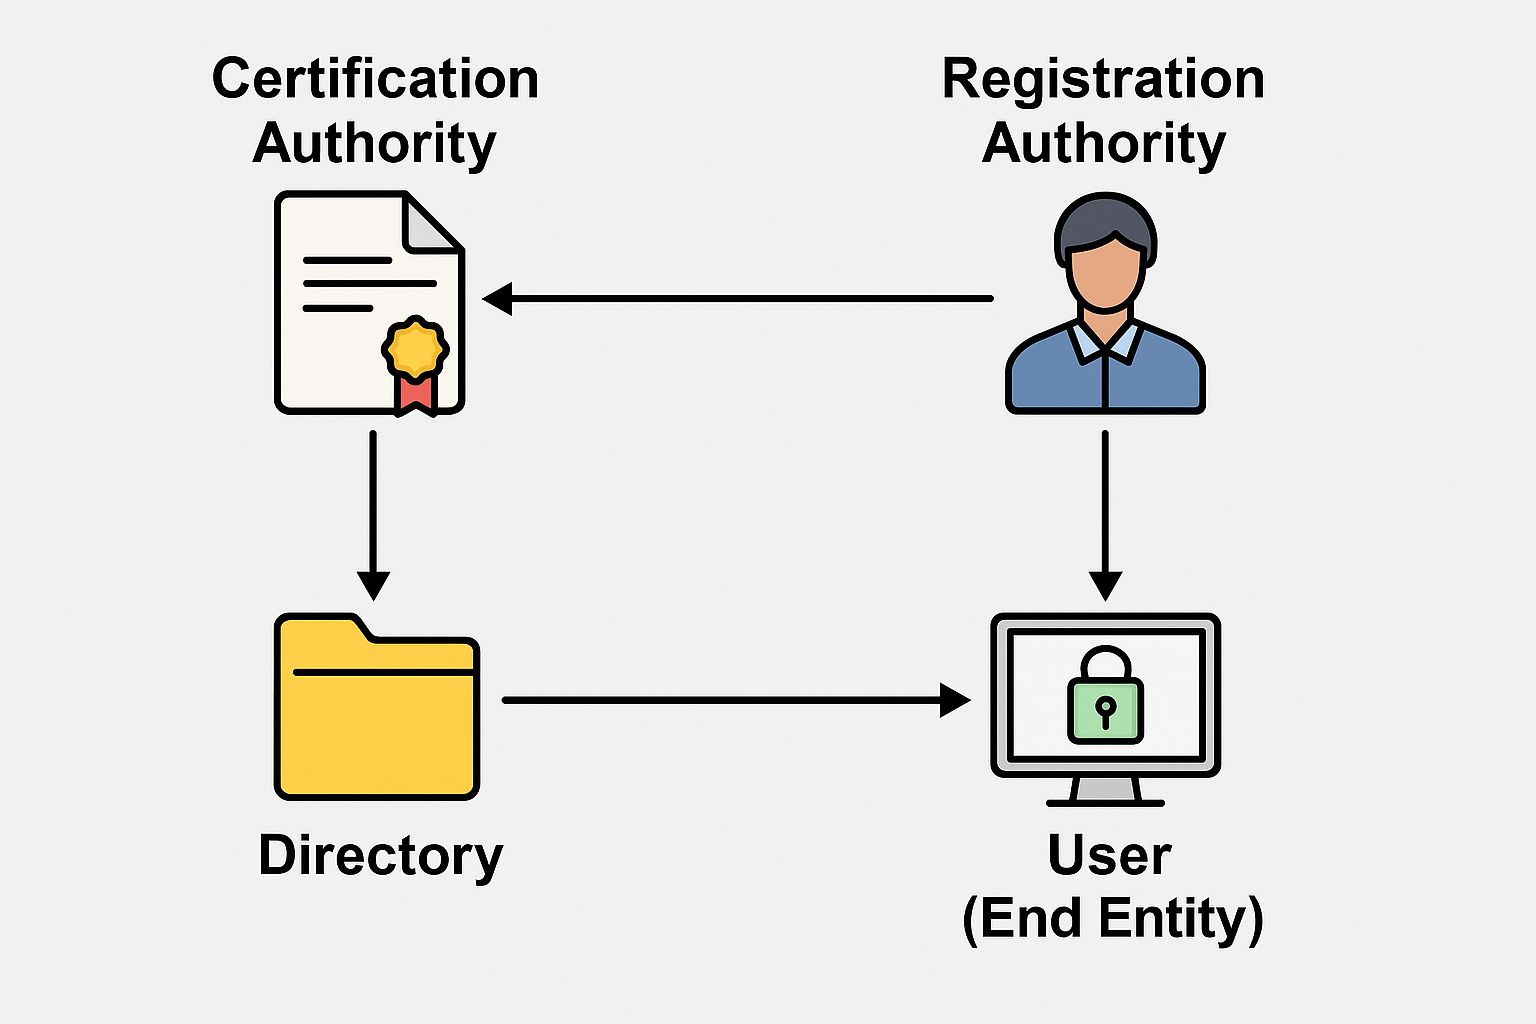

In [2]:
from IPython.display import Image

# 이미지 파일 경로 설정
image_path = 'pki2.png'

# 이미지 출력
Image(filename=image_path)

### Q. 그래서 전자서명의 주체는 CA에요?

아주 중요한 포인트를 짚으셨습니다.

그러나 **전자서명의 "주체(subject)"는 상황에 따라 다릅니다.**

📌 **"전자서명"의 주체 ≠ 항상 CA**입니다.

---

## ✅ 상황별 전자서명의 주체 정리

| 사용 맥락 | 전자서명 생성 주체 | 설명 |
| --- | --- | --- |
| **인증서 발급 (PKI)** | ✅ **CA** | 인증서의 무결성 보장→ CA의 **개인키로 서명** |
| **사용자 서명 (메일, 문서, 코드 등)** | ✅ **사용자 (엔티티)** | 사용자가 본인임을 증명→ **사용자의 개인키로 서명** |
| **전자계약 등 실명 인증서** | ✅ **개인, 법인 당사자** | 법적 효력 발생→ 공인인증서 시절 개인키로 서명 |

---

## 🎯 예시 비교

### [1] PKI 인증서 구조 (`.crt`)

- CA가 공개키에 해시 후 **서명**
- ✅ **전자서명의 주체 = CA**
- 사용자는 서명 안 함

### [2] Git 커밋 서명, 전자문서 서명

- 사용자가 본문 해시 → 개인키로 서명
- ✅ **전자서명의 주체 = 사용자**

---

## 💡 공시 암기 요령

> "전자서명의 주체는 누구인가?"
>
>
> → **누가 자신의 개인키로 서명했는지를 따진다**
>
- 인증서라면? → **CA**
- 문서나 계약이라면? → **사용자(개인/법인)**

---

### Q. 그러니까 pki에서 전자서명의 주체는 ca에요?

네, **정확하게 말씀드리면:**

> ✅ PKI에서 전자서명의 주체는 "인증기관(CA)"입니다.
>

---

## 🔐 왜 CA가 전자서명의 주체인가요?

- CA는 사용자(서버 등)의 **공개키 인증서(cert.pem)**를 발급할 때,
    - 그 안에 들어 있는 내용을 해시
    - 그리고 그 해시값에 **자신의 개인키로 전자서명**합니다

즉,

- 📄 인증서의 서명(signature) = CA가 서명한 값
- 🧾 이 서명을 검증하는 쪽 (브라우저 등)은 **CA의 공개키**를 사용해서 인증서가 위조되지 않았는지 확인

---

## 🎯 공시용 정답 표현 예시

> Q. PKI 환경에서 전자서명을 생성하는 주체는 누구인가?
>
> - 정답: **인증기관(CA)**

---

## 💡 간단 도식 요약

```
[사용자] ---> 공개키 + 신원정보 ---> [CA]
                                          ↓
                                   CA의 개인키로 서명
                                          ↓
                        --> X.509 인증서 (전자서명 포함)

```

---

### 📌 추가 팁

- PKI에서는 **"전자서명 = 인증서의 무결성을 보장하는 수단"**이며,
- 그것을 **보장해주는 주체 = CA**

→ 따라서 **전자서명의 주체는 CA**가 맞습니다.

## Q. 공개키 기반구조(PKI)에 대해 옳지 않은 것과 `Let's encrypt`의 상관관계

당신이 언급하신 **Let's Encrypt 인증서 자동 갱신 구조**와 **CRL(인증서 폐지 목록)** 조사는 관련이 있지만, 서로 **다른 층위의 개념**입니다. 문제의 보기 해설을 실무 기준으로 풀어볼게요.

---

## ❌ 보기:

> “유효기간 내의 인증서를 가지고 있다면, 사용자는 별도로 CRL을 조사할 필요가 없다” → 틀린 보기
>

---

## ✅ 이유: CRL은 "폐지된 인증서"를 감지하기 위해 반드시 확인해야 함

- 인증서는 유효기간이 남아 있어도 **중간에 폐기(revoke)**될 수 있습니다.
    - 예: 개인키 유출, 도메인 소유권 이전 등
- 따라서 클라이언트(브라우저, 운영체제)는:
    - 인증서가 아직 유효하더라도
    - **CRL 또는 OCSP를 통해 실시간으로 유효성 검사를 해야 함**

→ 그래서 보기의 문장은 **틀린 말**입니다.

---

## 🔧 실무 연결: Let's Encrypt + nginx + 자동 갱신

### 당신이 경험한 구성 (예시):

- 인증서 유효기간: 보통 90일 (Let's Encrypt)
- 자동 갱신 스크립트 (예: certbot) 실행:

    ```bash
    bash
    복사편집
    certbot renew --post-hook "nginx -s reload"

    ```

- 즉, nginx가 새로운 인증서(.pem)를 **로컬에 재적용**할 뿐이지,

    ❌ 브라우저가 CRL을 생략하거나 검사하지 않는 구조는 아닙니다.


---

## 🔍 개념 차이 요약

| 항목 | 자동갱신 (`certbot`) | CRL / OCSP |
| --- | --- | --- |
| 위치 | 서버 관리자 설정 | 클라이언트(브라우저, OS) 측에서 수행 |
| 목적 | 유효기간 연장 | 폐기 여부 실시간 확인 |
| 실행 주체 | 서버 소유자 | 인증서 **검증자** (ex. 브라우저) |
| 연관성 | 간접적만 있음 | 별개 역할 |

---

## 📌 결론

> Let's Encrypt 자동갱신은 **"인증서 유효기간 문제를 예방"**하는 것이고,
>
>
> CRL 조사는 **"인증서가 유효해 보여도 폐기되었는지 확인"**하는 과정입니다.
>

→ 둘은 서로 보완적인 관계고, 시험에서는 **CRL/OCSP가 생략될 수 없다는 점**이 핵심이에요.

## ✅ CRL vs OCSP 비교표

| 항목 | **CRL (Certificate Revocation List)** | **OCSP (Online Certificate Status Protocol)** |
| --- | --- | --- |
| 🔍 개념 | 폐기된 인증서들의 **목록 전체를 제공** | 인증서 상태를 **실시간으로 질의-응답** |
| 📦 전달 방식 | 인증서 폐기 목록 파일 다운로드 | 인증서 상태 요청(질문) → 응답 받음 |
| 📁 형식 | `crl.pem` 같은 정적 파일 (X.509 형식) | HTTP 기반 요청/응답 |
| 📅 갱신 주기 | 주기적으로 업데이트 필요 | 실시간 (On-demand) |
| 🐢 성능 | 목록 크기에 따라 느릴 수 있음 | 빠르고 효율적 |
| 💡 실무 적용 | 구형 시스템, 기업 내부망, 오프라인 환경 | 대부분의 최신 브라우저 사용 방식 |
| 🔐 보안 기능 | 위변조 방지용으로 서명 포함 | 응답도 전자서명 포함 |
| 🧭 단점 | 목록이 커질수록 느림, 실시간 아님 | 프라이버시 이슈 (누가 어떤 인증서 쓰는지 서버가 앎) |
| 🎓 공시 포인트 | 정적 목록, 효율 낮음, 브라우저는 점점 안 씀 | 실시간 응답, 효율적, 브라우저에서 기본 사용 |

---

## 💡 함께 외우기

- **CRL**: "목록 통째로", 느리고 무겁다 → 구형 방식
- **OCSP**: "실시간 물어본다", 빠르고 가볍다 → 현대적 방식

---

## 📌 실무 예시

🔎 브라우저가 HTTPS 사이트 접속 시:

- 인증서 유효 확인 시,

    → **OCSP 서버에 상태 질의 요청 전송**

    → 응답에서 "Good", "Revoked", "Unknown" 중 하나 받음

## ✅ X.509 인증서의 "확장 영역(Extensions)"이란?

> 기본 필드(버전, 발급자, 유효기간 등) 외에,
>
>
> **인증서의 사용 목적, 제한사항, 권한, 경로설정 등을 명시하는 추가 정보 필드**
>

---

## 📄 주요 확장 필드 정리표

| 확장 필드 이름 | 역할 | 공시 포인트 |
| --- | --- | --- |
| **Key Usage** | 공개키의 사용 목적 제한(예: 서명용, 암호화용) | "서명만 가능" 인증서인지 여부 판단 |
| **Extended Key Usage (EKU)** | 좀 더 세분화된 사용 목적(예: 서버 인증, 클라이언트 인증, 코드 서명) | VPN용, 서버용 인증서 등 구분 |
| **Subject Alternative Name (SAN)** | 주체의 **다른 도메인/식별자** 지정 | `example.com`, `www.example.com` 모두 인증 가능 |
| **Basic Constraints** | 이 인증서가 **CA인지 아닌지**, 하위 인증서 발급 가능 여부 | `CA: TRUE`이면 하위 인증서 발급 가능 |
| **CRL Distribution Point** | CRL(폐기 목록) 주소 정보 | 브라우저가 CRL 참조할 URL |
| **Authority Key Identifier / Subject Key Identifier** | 키 추적 정보 (누가 발급했는지, 어떤 키인지 식별) | CA-하위 인증서 매칭 가능 |

---

## 📌 시험 출제 예시 보기

> Q. 다음 중 X.509 인증서의 확장 필드에 해당하지 않는 것은?
>
1. Key Usage
2. Subject Alternative Name
3. Serial Number ← ❌ 기본 필드
4. Basic Constraints

---

## 💡 실무 연결 (cert.pem 보기)

```bash
openssl x509 -in cert.pem -text -noout

```

확장 필드는 아래와 같이 보입니다:

```
X509v3 extensions:
    X509v3 Key Usage: critical
        Digital Signature, Key Encipherment
    X509v3 Extended Key Usage:
        TLS Web Server Authentication, TLS Web Client Authentication
    X509v3 Subject Alternative Name:
        DNS:example.com, DNS:www.example.com

```

---

## ✅ 암기 요령

- `Key Usage` = 기본 사용 목적
- `Extended Key Usage` = 세부 사용 목적
- `Basic Constraints` = 이 인증서가 **CA인가 아닌가**
- `SAN` = 인증 도메인 목록

## `.pem` 확장자

`.pem` 확장자는 **"인증서만을 위한 게 아니라, 다양한 보안 키와 인증 정보를 담는 범용 텍스트 형식"**입니다.

즉, **HTTPS에도 쓰이고**, **EC2/Elastic Beanstalk(EBS)** 같은 **AWS 리소스에도 쓰입니다.**

---

## ✅ `.pem` 확장자란?

> Privacy Enhanced Mail의 줄임말이지만,
>
>
> 지금은 **PKI 기반의 공개키/개인키/인증서/CA 번들** 등을 **Base64로 인코딩한 파일 형식**을 의미함
>

---

## 📦 PEM에 담을 수 있는 것들

| 용도 | 예시 | 내용 |
| --- | --- | --- |
| ✅ **인증서** | `cert.pem`, `fullchain.pem` | 공개키 + CA 서명 포함 |
| ✅ **개인키** | `privkey.pem`, `my-key.pem` | RSA, ECDSA 개인키 |
| ✅ **공개키** | `pubkey.pem` | 공개키만 따로 추출 |
| ✅ **인증서 번들** | `ca-bundle.pem`, `chain.pem` | 중간 인증기관 포함 |
| ✅ **AWS 키 파일** | `ec2-keypair.pem` | EC2 인스턴스에 SSH 접속 시 사용하는 개인키 (PEM 형식) |

---

## 🌐 HTTPS vs ☁️ AWS에서의 PEM 차이

| 상황 | PEM 사용 예 | 설명 |
| --- | --- | --- |
| **HTTPS 인증서 (웹서버)** | `cert.pem`, `privkey.pem` | 인증서 구성 요소 |
| **AWS EC2** | `my-ec2-key.pem` | 인스턴스에 SSH 접속할 때 사용하는 **개인키** |
| **AWS Elastic Beanstalk** | TLS 인증서 업로드용 `.pem` 또는 `.crt/.key` 쌍 사용 | HTTPS 설정 가능 |

---

## 💡 실무 예시 1: EC2 접속

```bash
bash
복사편집
ssh -i my-ec2-key.pem ec2-user@ec2-xx-xx-xx-xx.compute.amazonaws.com

```

- `i` 옵션 뒤에 PEM 형식의 개인키가 들어갑니다
- 이것도 본질적으로 **PKI 기반 인증**의 한 형태입니다

---

## 📌 결론

- ✅ **`.pem` = 인증서에만 쓰는 게 아니다**
- ✅ **개인키, 공개키, 인증서, 체인 모두 담을 수 있는 형식**
- ✅ **AWS에서도 SSH용 개인키로 사용** (즉, “전자서명 목적의 개인키”)

## ✅ X.509 인증서 구조: 기본영역 vs 확장영역

### 1️⃣ 기본 영역 (필수 정보)

> 인증서의 기본적인 신원 및 유효성 관련 정보
>

| 항목 | 설명 | 예시 |
| --- | --- | --- |
| **Version** | 인증서 버전 (v1, v2, v3) | v3 |
| **Serial Number** | CA가 발급한 고유 번호 | `04:1f:99:...` |
| **Signature Algorithm** | 서명 알고리즘 | `sha256WithRSAEncryption` |
| **Issuer** | 인증서 발급자 (CA 정보) | `CN=Let's Encrypt Authority X3` |
| **Validity** | 유효기간 (`Not Before`, `Not After`) | 2025.01.01 ~ 2025.04.01 |
| **Subject** | 인증 대상(서버/사용자) 정보 | `CN=example.com` |
| **Subject Public Key Info** | 공개키 + 알고리즘 | RSA/ECDSA 2048bit |

---

### 2️⃣ 확장 영역 (v3부터 가능)

> 인증서의 세부적인 목적, 제한사항, 폐기 관련 정보 등 부가적인 보안 메타데이터
>

| 확장 필드명 | 설명 | 공시 포인트 |
| --- | --- | --- |
| **Key Usage** | 공개키 사용 목적 제한 | 서명, 암호화, 인증 구분 |
| **Extended Key Usage (EKU)** | 용도 세분화 | 서버인증, 클라이언트인증, 코드서명 등 |
| **Basic Constraints** | CA 여부 및 경로 길이 제한 | `CA:TRUE` → 하위 인증서 발급 가능 |
| **Subject Alternative Name (SAN)** | Subject 보완용 도메인/IP 추가 | `DNS:www.example.com` |
| **CRL Distribution Points** | 폐기목록 URL | 브라우저가 인증서 폐기 여부 확인 |
| **Authority Key Identifier** | 발급자 키 ID | 상위 CA 식별 |
| **Subject Key Identifier** | 이 인증서의 키 ID | 체인 연결 추적용 |

---

## 📌 암기 요령

| 영역 | 기억법 |
| --- | --- |
| **기본 영역** | **"누가, 누구에게, 언제까지, 어떤 공개키를 발급했는가"** |
| **확장 영역** | **"그 인증서로 뭘 할 수 있는지, 어떤 조건이 붙는지"** |

---

## 🎯 시험 대비 포인트

- ✅ **Serial Number**: 기본 영역
- ✅ **Key Usage**, **SAN**: 확장 영역
- ❌ "인증서 폐기 여부는 기본 정보에 포함된다" → X (확장 영역 `CRL DP` 또는 OCSP 응답으로 확인)

---

## 🧪 실무 확인 명령어

```bash
openssl x509 -in cert.pem -text -noout

```

출력 상에서:

- 위쪽 → **기본 영역**
- `X509v3 extensions:` 아래 → **확장 영역**

## ✅ 1. 실무자 입장에서 "인증서 취소 목록(CRL)"은?

실무자는 다음만 정확히 알면 충분합니다:

| 항목 | 실무자 기준 설명 |
| --- | --- |
| **CRL이란?** | 폐기된 인증서들의 리스트 |
| **왜 필요한가?** | 인증서가 유효기간 내라도 키 유출 등으로 폐기될 수 있기 때문 |
| **누가 관리하나?** | CA가 주기적으로 갱신하여 배포 |
| **어디서 확인하나?** | 인증서의 `CRL Distribution Point` 필드에 명시됨 |
| **브라우저는 어떻게 확인하나?** | CRL 또는 OCSP로 유효성 자동 확인 (사용자가 개입 안 해도 됨) |
| **실무에서 해야 할 일은?** | nginx, apache 등에서 최신 인증서/체인 적용만 잘 하면 됨 (certbot 등 자동화 활용) |

✅ 실무자는 **“CRL/OCSP는 클라이언트가 알아서 검사하는 것”** 정도만 이해하면 충분합니다.

---

## ❗ 2. 공무원 시험 입장에서 "CRL"은?

공시는 세세한 원리까지 **암기형으로 모두 알아야** 합니다.

### 🔍 시험 포인트 정리

| 항목 | 공시용 정리 |
| --- | --- |
| **정의** | CA가 폐기된 인증서 목록을 관리하고 정기적으로 공개하는 리스트 |
| **형식** | X.509 기반 정적 파일 (`crl.pem`) |
| **위치** | 인증서 확장영역의 `CRL Distribution Point` 필드에 URL로 명시 |
| **주기** | 갱신 주기가 정해져 있고 실시간 아님 |
| **한계** | 목록이 커질수록 검색 속도 느림 → OCSP로 대체되는 중 |
| **검증 주체** | 클라이언트 (브라우저, OS, 인증서 검증자)가 확인해야 함 |
| **스테이플링** | OCSP 응답을 서버가 미리 준비해주는 구조 → 성능 향상 (보안성 향상) |

---

## 📌 공시 예시 보기

> Q. CRL의 단점으로 옳지 않은 것은?
>
>
> ① 실시간성이 떨어진다
>
> ② 인증서 폐기 정보를 모두 포함하므로 보안성이 높다 ← ❌ (보안성과는 직접 관련 없음)
>
> ③ 클라이언트가 주기적으로 다운로드해야 한다
>
> ④ 목록이 커질수록 성능이 저하된다
>

---

## 🧠 요약 암기

| 관점 | 핵심 요약 |
| --- | --- |
| **실무자** | 자동화만 되면 됨. certbot/letsencrypt + nginx에서 최신 인증서 사용이 핵심 |
| **공시 수험생** | **정의, 구조, 한계, 비교(OCSP), 응답 형식** 등 **모든 항목 암기 필요** |

공무원 시험에서 자주 나오는 질문 중 하나가 바로:

> "X.509 인증서에 포함되지 않는 정보는 무엇인가?"
>

그 중에서 정답으로 자주 나오는 함정이 바로 **"사용자 이름(Username)"**입니다.

---

## ✅ 왜 "사용자 이름"은 X.509 인증서에 포함되지 않는가?

- **X.509 인증서의 Subject 필드**에는 다음과 같은 **식별 정보**가 들어갑니다:

| 필드 | 의미 | 예시 |
| --- | --- | --- |
| CN (Common Name) | 일반 이름 (도메인, 개인명) | `www.example.com`, `홍길동` |
| O (Organization) | 조직명 | `OpenAI Inc.` |
| OU (Org. Unit) | 부서명 | `Security Division` |
| C (Country) | 국가 코드 | `KR`, `US` |
| L (Locality) | 지역 | `Seoul` |
| ST (State) | 도/광역시 | `Seoul` |

→ ✅ 이 정보는 모두 **공개적으로 서명 가능한 인증 주체 정보**

---

## ❌ 반면, "Username"은 다음과 같은 이유로 포함되지 않음

| 이유 | 설명 |
| --- | --- |
| 🔐 인증서의 공개성 | 인증서는 누구나 열람 가능 → 내부 계정명 노출은 위험 |
| 🎯 용도 차이 | Username은 OS/서비스 내부 인증용 정보 |
| 🔍 식별 기준 차이 | 인증서는 주로 도메인 또는 **정식 실명/회사명 기준** |
| ✅ 포함되는 식별자는 | "CN=홍길동" 같은 이름은 가능하나 "user1234"는 아님 |

---

## 🎓 시험 포인트 요약

| 포함됨 | 포함되지 않음 |
| --- | --- |
| CN, O, OU, C, ST, L | ❌ 사용자 이름 (Username), 비밀번호 |
| 공개키 정보 | ❌ 개인키 |
| 유효기간 | ❌ 세션키 |
| 서명 알고리즘 | ❌ MAC, HMAC |

---

## 🔍 예시 보기 문제

> Q. 다음 중 X.509 인증서에 포함되지 않는 정보는?
>
> 1. 공개키
> 2. 인증서 유효기간
> 3. 사용자 이름
> 4. 발급자 정보
>
>     → ✅ 정답: **3) 사용자 이름**
>

## ✅ 예시 인증서 보기 (실무자 시선 + 공시용 병행)

```bash
openssl x509 -in cert.pem -text -noout
```

출력 예시 (중요 부분만):

```bash
Certificate:
    Data:
        Version: 3 (0x2)
        Serial Number: 04:1f:99:...
        Signature Algorithm: sha256WithRSAEncryption
        Issuer: C=US, O=Let's Encrypt, CN=R3
        Validity:
            Not Before: Apr  1 00:00:00 2024 GMT
            Not After : Jul  1 00:00:00 2024 GMT
        Subject: CN=www.example.com
        Subject Public Key Info:
            Public Key Algorithm: rsaEncryption
            Public-Key: (2048 bit)
    X509v3 extensions:
        X509v3 Key Usage: critical
            Digital Signature, Key Encipherment
        X509v3 Subject Alternative Name:
            DNS:example.com, DNS:www.example.com

```

### 📌 이 예시로 배울 수 있는 것

| 공시용 용어 | 실무 대응 해설 |
| --- | --- |
| `Subject` | 인증 대상 = 도메인 또는 사용자 실명 |
| `Key Usage` | 이 키로 "디지털 서명", "세션키 암호화"만 가능 |
| `SAN` | 여러 도메인에서 인증서 하나로 커버 |
| `Not After` | certbot 자동갱신 기준점 |
| `Signature Algorithm` | 전자서명에 사용된 해시 + 암호화 방식 |

---

## ✍️ 실무자 → 공시 전환자를 위한 추천 학습 흐름

1. **openssl + nginx 실습**

    → 직접 cert.pem 확인, 실시간 접속 로그 분석

2. **공시 개념 연결**

    → X.509 구조, 전자서명 목적, CRL/OCSP 용도

3. **보안기사/정보보안 개념 반영**

    → MAC, 암호화 구조, 대칭/비대칭 비교

4. **OX/객관식 문제풀이**

    → "틀린 보기를 고르시오" 위주로 보기의 문장 구조 파악


---
